# Загрузка данных

In [4]:
! wget -nc https://fls.avasiliev.xyz/Lectures/PathologySegmentation/SIIM-ACR-Pneumothorax-Segmentation.zip 
! unzip -n -q SIIM-ACR-Pneumothorax-Segmentation.zip

File ‘SIIM-ACR-Pneumothorax-Segmentation.zip’ already there; not retrieving.



In [5]:
! ls SIIM-ACR-Pneumothorax-Segmentation

dicom-images  masks  test.csv  train.csv  val.csv


*Примичание: представленные данные являются предварительно обработанной версией датасета из kaggle соревнования [SIIM-ACR-Pneumothorax-Segmentation](https://www.kaggle.com/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data).*

# Базовый EDA

In [38]:
import pandas as pd

Данные представляют собой записи рентгенографических исследований в формате DICOM. Они хранятся в директории `SIIM-ACR-Pneumothorax-Segmentation/dicom-images` и организованы в стандартную для таких данных файловую структуру:

`SIIM-ACR-Pneumothorax-Segmentation/dicom-images/id исследования/id серии/id изобржения.dcm`,

прием каждое исследование содержит ровно одну серию и одно изображение (на практике серий и изображений может быть несколько).

Каждому изображения соответствует маска сегментации, полученная при ручной разметке врачами. Маски хранятся в директории `SIIM-ACR-Pneumothorax-Segmentation/masks` и организованы точно так же, как и исследования:

`SIIM-ACR-Pneumothorax-Segmentation/masks/id исследования/id серии/id изобржения.png`,

маски представляют собой одноканальные ч/б изобржаения в формате png, в которых цветом 255 выделена область патологии (пневмоторакс, PNTX), а цветом 0 обозначена часть изображения с нормой.

Для обучения моделей сегментации выборка разделена на тренировочную, валидационную и тестовые выборки. Это разбиению соответствуют таблицы в csv. Посмотрим на эти данные:

In [6]:
train_df = pd.read_csv('SIIM-ACR-Pneumothorax-Segmentation/train.csv')
val_df = pd.read_csv('SIIM-ACR-Pneumothorax-Segmentation/val.csv')
test_df = pd.read_csv('SIIM-ACR-Pneumothorax-Segmentation/test.csv')

In [7]:
train_df

,study_id,series_id,sop_id,sop_path,PNTX,mask_path
0,1.2.276.0.7230010.3.1.2.8323329.14521.15178752...,1.2.276.0.7230010.3.1.3.8323329.14521.15178752...,1.2.276.0.7230010.3.1.4.8323329.14521.15178752...,1.2.276.0.7230010.3.1.2.8323329.14521.15178752...,1.0,1.2.276.0.7230010.3.1.2.8323329.14521.15178752...
1,1.2.276.0.7230010.3.1.2.8323329.10406.15178752...,1.2.276.0.7230010.3.1.3.8323329.10406.15178752...,1.2.276.0.7230010.3.1.4.8323329.10406.15178752...,1.2.276.0.7230010.3.1.2.8323329.10406.15178752...,0.0,1.2.276.0.7230010.3.1.2.8323329.10406.15178752...
2,1.2.276.0.7230010.3.1.2.8323329.13892.15178752...,1.2.276.0.7230010.3.1.3.8323329.13892.15178752...,1.2.276.0.7230010.3.1.4.8323329.13892.15178752...,1.2.276.0.7230010.3.1.2.8323329.13892.15178752...,1.0,1.2.276.0.7230010.3.1.2.8323329.13892.15178752...
3,1.2.276.0.7230010.3.1.2.8323329.14322.15178752...,1.2.276.0.7230010.3.1.3.8323329.14322.15178752...,1.2.276.0.7230010.3.1.4.8323329.14322.15178752...,1.2.276.0.7230010.3.1.2.8323329.14322.15178752...,0.0,1.2.276.0.7230010.3.1.2.8323329.14322.15178752...
4,1.2.276.0.7230010.3.1.2.8323329.1523.151787516...,1.2.276.0.7230010.3.1.3.8323329.1523.151787516...,1.2.276.0.7230010.3.1.4.8323329.1523.151787516...,1.2.276.0.7230010.3.1.2.8323329.1523.151787516...,0.0,1.2.276.0.7230010.3.1.2.8323329.1523.151787516...
...,...,...,...,...,...,...
10160,1.2.276.0.7230010.3.1.2.8323329.5198.151787518...,1.2.276.0.7230010.3.1.3.8323329.5198.151787518...,1.2.276.0.7230010.3.1.4.8323329.5198.151787518...,1.2.276.0.7230010.3.1.2.8323329.5198.151787518...,0.0,1.2.276.0.7230010.3.1.2.8323329.5198.151787518...
10161,1.2.276.0.7230010.3.1.2.8323329.11718.15178752...,1.2.276.0.7230010.3.1.3.8323329.11718.15178752...,1.2.276.0.7230010.3.1.4.8323329.11718.15178752...,1.2.276.0.7230010.3.1.2.8323329.11718.15178752...,0.0,1.2.276.0.7230010.3.1.2.8323329.11718.15178752...
10162,1.2.276.0.7230010.3.1.2.8323329.5117.151787518...,1.2.276.0.7230010.3.1.3.8323329.5117.151787518...,1.2.276.0.7230010.3.1.4.8323329.5117.151787518...,1.2.276.0.7230010.3.1.2.8323329.5117.151787518...,0.0,1.2.276.0.7230010.3.1.2.8323329.5117.151787518...
10163,1.2.276.0.7230010.3.1.2.8323329.13497.15178752...,1.2.276.0.7230010.3.1.3.8323329.13497.15178752...,1.2.276.0.7230010.3.1.4.8323329.13497.15178752...,1.2.276.0.7230010.3.1.2.8323329.13497.15178752...,0.0,1.2.276.0.7230010.3.1.2.8323329.13497.15178752...


In [22]:
train_df.iloc[0].sop_path

'1.2.276.0.7230010.3.1.2.8323329.14521.1517875252.507064/1.2.276.0.7230010.3.1.3.8323329.14521.1517875252.507063/1.2.276.0.7230010.3.1.4.8323329.14521.1517875252.507065.dcm'

In [23]:
train_df.iloc[0].mask_path

'1.2.276.0.7230010.3.1.2.8323329.14521.1517875252.507064/1.2.276.0.7230010.3.1.3.8323329.14521.1517875252.507063/1.2.276.0.7230010.3.1.4.8323329.14521.1517875252.507065.png'

In [24]:
train_df.iloc[0].PNTX

1.0

In [12]:
train_df.PNTX.value_counts()

PNTX
0.0    8041
1.0    2124
Name: count, dtype: int64

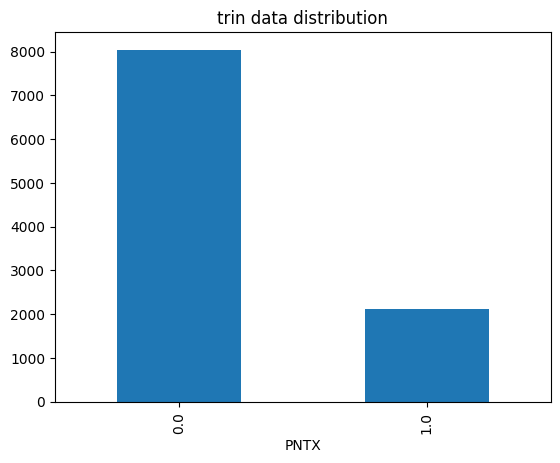

In [31]:
train_df.PNTX.value_counts().plot(kind='bar', title='trin data distribution');

In [8]:
val_df

,study_id,series_id,sop_id,sop_path,PNTX,mask_path
0,1.2.276.0.7230010.3.1.2.8323329.4887.151787518...,1.2.276.0.7230010.3.1.3.8323329.4887.151787518...,1.2.276.0.7230010.3.1.4.8323329.4887.151787518...,1.2.276.0.7230010.3.1.2.8323329.4887.151787518...,1.0,1.2.276.0.7230010.3.1.2.8323329.4887.151787518...
1,1.2.276.0.7230010.3.1.2.8323329.4177.151787518...,1.2.276.0.7230010.3.1.3.8323329.4177.151787518...,1.2.276.0.7230010.3.1.4.8323329.4177.151787518...,1.2.276.0.7230010.3.1.2.8323329.4177.151787518...,1.0,1.2.276.0.7230010.3.1.2.8323329.4177.151787518...
2,1.2.276.0.7230010.3.1.2.8323329.3709.151787517...,1.2.276.0.7230010.3.1.3.8323329.3709.151787517...,1.2.276.0.7230010.3.1.4.8323329.3709.151787517...,1.2.276.0.7230010.3.1.2.8323329.3709.151787517...,0.0,1.2.276.0.7230010.3.1.2.8323329.3709.151787517...
3,1.2.276.0.7230010.3.1.2.8323329.3598.151787517...,1.2.276.0.7230010.3.1.3.8323329.3598.151787517...,1.2.276.0.7230010.3.1.4.8323329.3598.151787517...,1.2.276.0.7230010.3.1.2.8323329.3598.151787517...,0.0,1.2.276.0.7230010.3.1.2.8323329.3598.151787517...
4,1.2.276.0.7230010.3.1.2.8323329.5610.151787518...,1.2.276.0.7230010.3.1.3.8323329.5610.151787518...,1.2.276.0.7230010.3.1.4.8323329.5610.151787518...,1.2.276.0.7230010.3.1.2.8323329.5610.151787518...,1.0,1.2.276.0.7230010.3.1.2.8323329.5610.151787518...
...,...,...,...,...,...,...
495,1.2.276.0.7230010.3.1.2.8323329.11694.15178752...,1.2.276.0.7230010.3.1.3.8323329.11694.15178752...,1.2.276.0.7230010.3.1.4.8323329.11694.15178752...,1.2.276.0.7230010.3.1.2.8323329.11694.15178752...,1.0,1.2.276.0.7230010.3.1.2.8323329.11694.15178752...
496,1.2.276.0.7230010.3.1.2.8323329.11219.15178752...,1.2.276.0.7230010.3.1.3.8323329.11219.15178752...,1.2.276.0.7230010.3.1.4.8323329.11219.15178752...,1.2.276.0.7230010.3.1.2.8323329.11219.15178752...,0.0,1.2.276.0.7230010.3.1.2.8323329.11219.15178752...
497,1.2.276.0.7230010.3.1.2.8323329.11821.15178752...,1.2.276.0.7230010.3.1.3.8323329.11821.15178752...,1.2.276.0.7230010.3.1.4.8323329.11821.15178752...,1.2.276.0.7230010.3.1.2.8323329.11821.15178752...,0.0,1.2.276.0.7230010.3.1.2.8323329.11821.15178752...
498,1.2.276.0.7230010.3.1.2.8323329.4416.151787518...,1.2.276.0.7230010.3.1.3.8323329.4416.151787518...,1.2.276.0.7230010.3.1.4.8323329.4416.151787518...,1.2.276.0.7230010.3.1.2.8323329.4416.151787518...,1.0,1.2.276.0.7230010.3.1.2.8323329.4416.151787518...


In [15]:
val_df.PNTX.value_counts()

PNTX
1.0    250
0.0    250
Name: count, dtype: int64

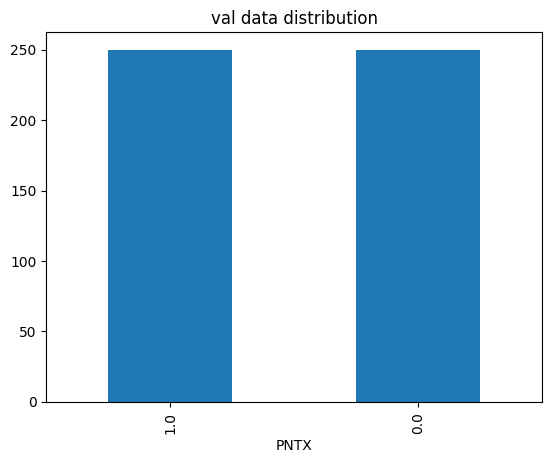

In [32]:
val_df.PNTX.value_counts().plot(kind='bar', title='val data distribution');

In [9]:
test_df

,study_id,series_id,sop_id,sop_path,PNTX,mask_path
0,1.2.276.0.7230010.3.1.2.8323329.2714.151787517...,1.2.276.0.7230010.3.1.3.8323329.2714.151787517...,1.2.276.0.7230010.3.1.4.8323329.2714.151787517...,1.2.276.0.7230010.3.1.2.8323329.2714.151787517...,1.0,1.2.276.0.7230010.3.1.2.8323329.2714.151787517...
1,1.2.276.0.7230010.3.1.2.8323329.2387.151787517...,1.2.276.0.7230010.3.1.3.8323329.2387.151787517...,1.2.276.0.7230010.3.1.4.8323329.2387.151787517...,1.2.276.0.7230010.3.1.2.8323329.2387.151787517...,0.0,1.2.276.0.7230010.3.1.2.8323329.2387.151787517...
2,1.2.276.0.7230010.3.1.2.8323329.2515.151787517...,1.2.276.0.7230010.3.1.3.8323329.2515.151787517...,1.2.276.0.7230010.3.1.4.8323329.2515.151787517...,1.2.276.0.7230010.3.1.2.8323329.2515.151787517...,1.0,1.2.276.0.7230010.3.1.2.8323329.2515.151787517...
3,1.2.276.0.7230010.3.1.2.8323329.2133.151787517...,1.2.276.0.7230010.3.1.3.8323329.2133.151787517...,1.2.276.0.7230010.3.1.4.8323329.2133.151787517...,1.2.276.0.7230010.3.1.2.8323329.2133.151787517...,0.0,1.2.276.0.7230010.3.1.2.8323329.2133.151787517...
4,1.2.276.0.7230010.3.1.2.8323329.12340.15178752...,1.2.276.0.7230010.3.1.3.8323329.12340.15178752...,1.2.276.0.7230010.3.1.4.8323329.12340.15178752...,1.2.276.0.7230010.3.1.2.8323329.12340.15178752...,0.0,1.2.276.0.7230010.3.1.2.8323329.12340.15178752...
5,1.2.276.0.7230010.3.1.2.8323329.1107.151787516...,1.2.276.0.7230010.3.1.3.8323329.1107.151787516...,1.2.276.0.7230010.3.1.4.8323329.1107.151787516...,1.2.276.0.7230010.3.1.2.8323329.1107.151787516...,1.0,1.2.276.0.7230010.3.1.2.8323329.1107.151787516...
6,1.2.276.0.7230010.3.1.2.8323329.32262.15178751...,1.2.276.0.7230010.3.1.3.8323329.32262.15178751...,1.2.276.0.7230010.3.1.4.8323329.32262.15178751...,1.2.276.0.7230010.3.1.2.8323329.32262.15178751...,1.0,1.2.276.0.7230010.3.1.2.8323329.32262.15178751...
7,1.2.276.0.7230010.3.1.2.8323329.3236.151787517...,1.2.276.0.7230010.3.1.3.8323329.3236.151787517...,1.2.276.0.7230010.3.1.4.8323329.3236.151787517...,1.2.276.0.7230010.3.1.2.8323329.3236.151787517...,0.0,1.2.276.0.7230010.3.1.2.8323329.3236.151787517...
8,1.2.276.0.7230010.3.1.2.8323329.3590.151787517...,1.2.276.0.7230010.3.1.3.8323329.3590.151787517...,1.2.276.0.7230010.3.1.4.8323329.3590.151787517...,1.2.276.0.7230010.3.1.2.8323329.3590.151787517...,1.0,1.2.276.0.7230010.3.1.2.8323329.3590.151787517...
9,1.2.276.0.7230010.3.1.2.8323329.4686.151787518...,1.2.276.0.7230010.3.1.3.8323329.4686.151787518...,1.2.276.0.7230010.3.1.4.8323329.4686.151787518...,1.2.276.0.7230010.3.1.2.8323329.4686.151787518...,0.0,1.2.276.0.7230010.3.1.2.8323329.4686.151787518...


In [17]:
test_df.PNTX.value_counts()

PNTX
1.0    5
0.0    5
Name: count, dtype: int64

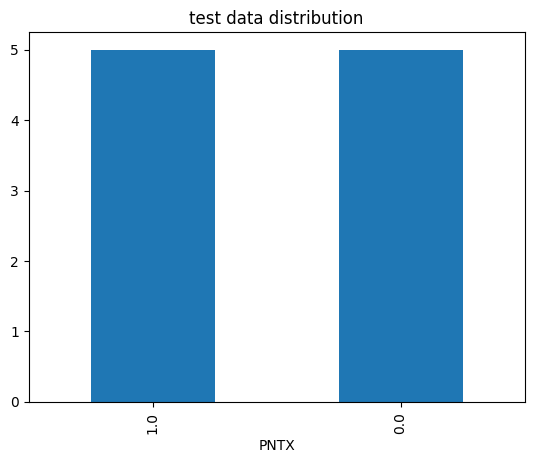

In [33]:
test_df.PNTX.value_counts().plot(kind='bar', title='test data distribution');

Таким образом, мы видим что разметка содержит пути до изображений в формате `dcm`, соответствующие им пути до GT масок в `png`, а также бинарную колонку `PNTX` с информацией о патологичности изображения. Валидационная и тестовые выборки сбалансированы, а тренировочная содержит значительный дисбаланс.

# Чтение изображений в DICOM

Для чтения изображений в формате DICOM удобно воспользоваться библиотекой `pydicom`, которая позволяет считывать файлы такого типа и извлекать из них метаиформацию об исследовании и изображение в виде numpy массива.

In [ ]:
! pip install pydicom 

In [34]:
import matplotlib.pyplot as plt
import pydicom

In [51]:
path_to_sample_dcm = (
    'SIIM-ACR-Pneumothorax-Segmentation/dicom-images/'
    '1.2.276.0.7230010.3.1.2.8323329.11694.1517875234.339812/'
    '1.2.276.0.7230010.3.1.3.8323329.11694.1517875234.339811/'
    '1.2.276.0.7230010.3.1.4.8323329.11694.1517875234.339813.dcm'
)
dcm = pydicom.dcmread(path_to_sample_dcm)

DICOM файл содержит различную информацию о пациенте, дате проведения исследования и использованном аппарате:

In [52]:
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.11694.1517875234.339813
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.11694.1517875234.339813
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

Изображение в виде numpy-массива легко получить при обращении к атрибуту dcm.pixel_array

In [53]:
dcm.pixel_array

array([[ 25,  20,  16, ..., 245, 255, 167],
       [ 19,  15,  12, ..., 243, 255, 168],
       [ 12,  10,   7, ..., 238, 253, 167],
       ...,
       [  9,   9,   8, ..., 140, 168, 121],
       [ 10,  10,   9, ..., 141, 169, 123],
       [ 11,  11,  10, ..., 141, 170, 124]], dtype=uint8)

Обратите внимание, что в имеющихся у нас данных изображение хранится в формате uint8. На практике изображения в DICOM исследованиях имеют больший динамический диапазон и хранятся в формате uint16.

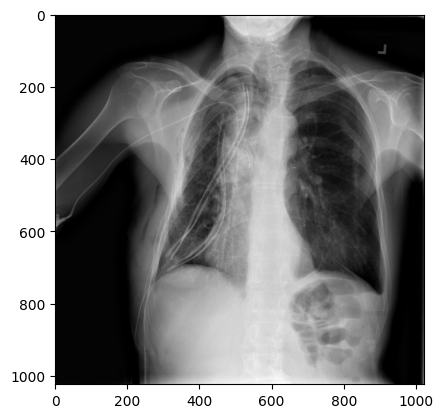

In [54]:
plt.imshow(dcm.pixel_array, cmap='gray')

# Чтение масок

Прочитаем GT маску для выбранного нами исследования и визуализируем её:

In [59]:
import cv2 as cv

In [60]:
path_to_sample_mask = (
    path_to_sample_dcm
    .replace('dicom-images', 'masks')
    .replace('dcm', 'png')
)
mask = cv.imread(path_to_sample_mask, cv.IMREAD_GRAYSCALE)

In [61]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

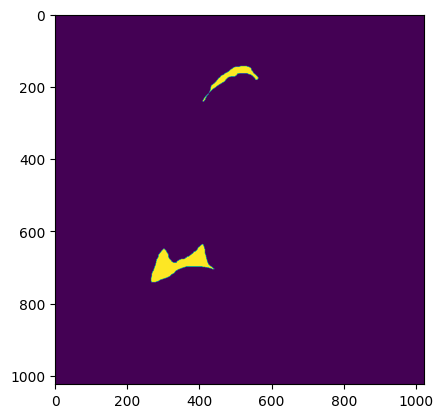

In [62]:
plt.imshow(mask)

Наложим маску патологичной области на изображение из исследования:

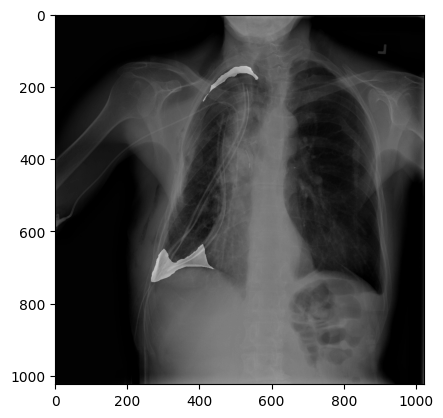

In [66]:
plt.imshow(dcm.pixel_array, cmap='gray')
plt.imshow(mask, alpha=0.4, cmap='gray')

**Наша задача:** обучить модель сегменации, которая на основе опыта врачей на тренировочной выборке будет воспроизводить разметку на тестовой и валидационной.